In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})



In [3]:
res = pd.read_csv('data/omni.tsv', sep="\t")
res

,tool,name,EPR,AUPRC,RAND,TF_targ,TF_enr,TF_only,celltype
0,GENIE3,kidney distal convoluted tubule epithelial cell,6.140000,0.002610,0.001090,12.900000,True,True,False
1,GENIE3,kidney distal convoluted tubule epithelial cell,1.590000,0.001080,0.001090,3.200000,False,False,True
2,GENIE3,kidney loop of Henle thick ascending limb epit...,4.070000,0.003190,0.001210,2.500000,True,True,True
3,GENIE3,kidney loop of Henle thick ascending limb epit...,0.430000,0.001180,0.001210,7.500000,False,False,True
4,GENIE3,kidney collecting duct principal cell,10.910000,0.005000,0.001390,1.400000,True,True,True
...,...,...,...,...,...,...,...,...,...
79,scPRINT-full,endothelial cell,2.121755,0.001084,0.000890,64.285714,False,False,False
80,scPRINT-mean,endothelial cell,0.657581,0.001366,0.001289,36.363636,True,False,True
81,scPRINT-mean,endothelial cell,6.338245,0.005163,0.001289,9.090909,True,True,True
82,scPRINT-class,endothelial cell,0.492976,0.001111,0.001289,9.090909,True,False,True


In [4]:
res['TF_only'] = res['TF_only'].replace({True: 'TF-gene only', False: "All"})
res = res.rename(columns={'TF_only': 'Format'})

In [54]:
violin_plot.get_xticks()

[0, 1, 2, 3, 4]

array(['GENIE3', 'scGPT', 'scPRINT-full', 'scPRINT-mean', 'scPRINT-class'],
      dtype=object)

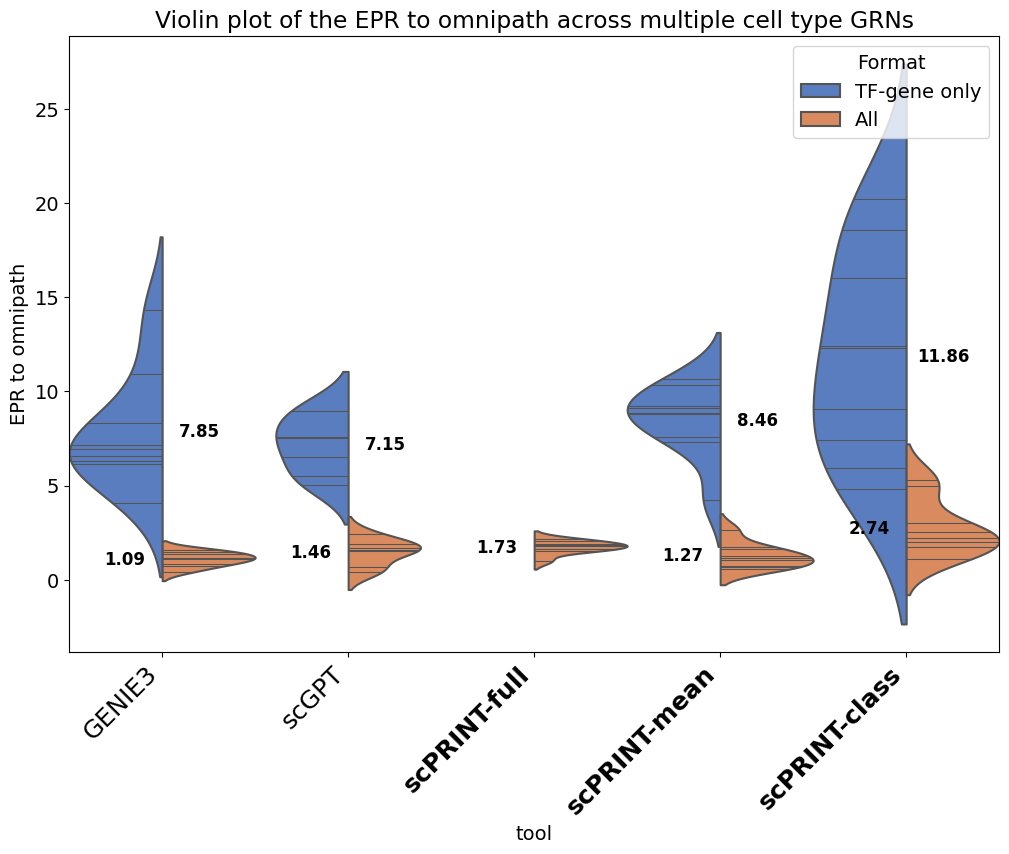

In [57]:
# Set the aesthetic style of the plots

# Create the violin plot with adjusted scale to fix the tiny side issue
plt.figure(figsize=(12, 8))
violin_plot = sns.violinplot(x='tool', y='EPR', hue="Format", data=res, split=True, density_norm='count', width=1, linewidth=1.5, palette="muted", inner='stick')

# Add the mean value as text
mean_values = res.groupby(['tool', 'Format'])['EPR'].mean().reindex(res['tool'].unique(), level=0).reset_index()

for i in range(mean_values.shape[0]):
    offset = 0.2 if mean_values['Format'][i] == 'TF-gene only' else -0.2
    xloc = res['tool'].unique().tolist().index(mean_values['tool'][i])
    violin_plot.text(xloc + offset, mean_values['EPR'][i], f"{mean_values['EPR'][i]:.2f}", color='black', ha="center", va="center", fontsize=12, fontweight='bold')
# Set the title and labels of the plot
violin_plot.set_title('Violin plot of the EPR to omnipath across multiple cell type GRNs')
violin_plot.set_xlabel('tool')
violin_plot.set_ylabel('EPR to omnipath')

# Rotate the x labels for better readability and align them
xticks_labels = plt.gca().get_xticklabels()
for i, label in enumerate(xticks_labels):
    if i > 1:
        label.set_fontweight('bold')
plt.xticks(ticks=plt.gca().get_xticks(), labels=xticks_labels, rotation=45, ha="right", fontsize=18)

# Show the plot
plt.show()


In [25]:
mean_values

,tool,Format,TF_targ
0,GENIE3,All,4.977778
1,GENIE3,TF-gene only,4.344444
2,scGPT,All,0.000000
3,scGPT,TF-gene only,0.000000
4,scPRINT-full,All,61.875541
5,scPRINT-mean,All,25.274581
6,scPRINT-mean,TF-gene only,7.945042
7,scPRINT-class,All,10.149868
8,scPRINT-class,TF-gene only,4.676946


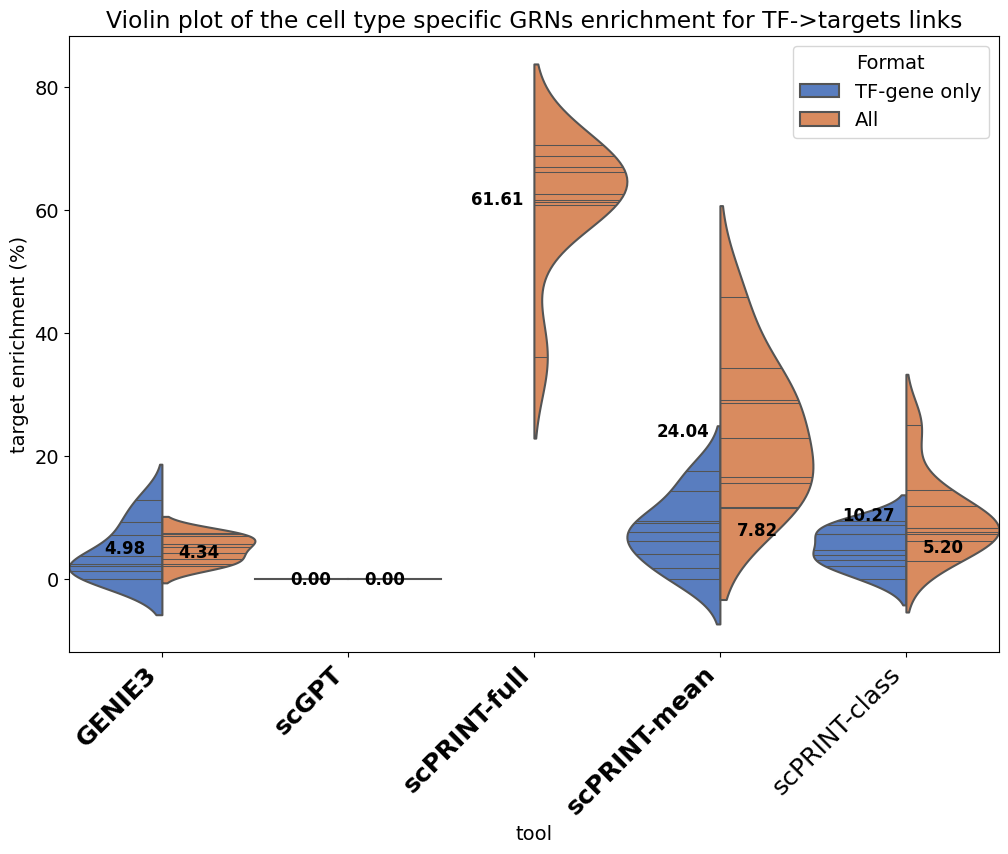

In [60]:
# Create the violin plot
plt.figure(figsize=(12, 8))

violin_plot = sns.violinplot(x='tool', y='TF_targ', hue="Format", data=res, split=True, density_norm='count', width=1, linewidth=1.5, palette="muted", inner='stick')

# Set the title and labels of the plot
violin_plot.set_title('Violin plot of the cell type specific GRNs enrichment for TF->targets links')
violin_plot.set_xlabel('tool')
violin_plot.set_ylabel('target enrichment (%)')
# Add the mean value as text
mean_values = res.groupby(['tool', 'Format'])['TF_targ'].mean().reindex(res['tool'].unique(), level=0).reset_index()

for i in range(mean_values.shape[0]):
    offset = 0.2 if mean_values['Format'][i] == 'TF-gene only' else -0.2
    xloc = res['tool'].unique().tolist().index(mean_values['tool'][i])
    violin_plot.text(xloc+offset, mean_values['TF_targ'][i], f"{mean_values['TF_targ'][i]:.2f}", color='black', ha="center", va="center", fontsize=12, fontweight='bold')

# Rotate the x labels for better readability
xticks_labels = plt.gca().get_xticklabels()
for i, label in enumerate(xticks_labels):
    if i < 4:
        label.set_fontweight('bold')
plt.xticks(ticks=plt.gca().get_xticks(), labels=xticks_labels, rotation=45, ha="right", fontsize=18)
# Show the plot
plt.show()

In [28]:
res['AUPRC'] = res['AUPRC'] - res['RAND']

In [38]:
res=  res[res.name!="endothelial cell"]

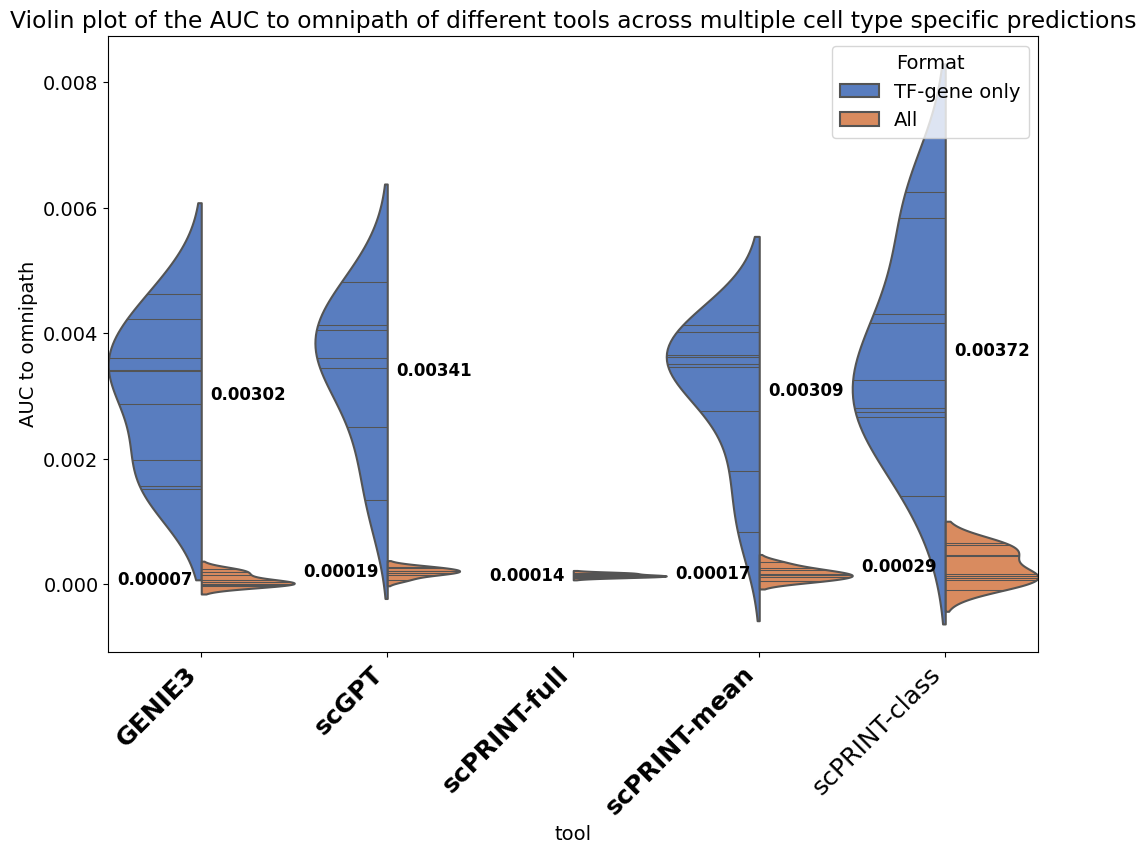

In [62]:
# Create the violin plot
plt.figure(figsize=(12, 8))
violin_plot = sns.violinplot(x='tool', y='AUPRC', hue="Format", data=res, split=True, density_norm='count', width=1, linewidth=1.5, palette="muted", inner='stick')

# Set the title and labels of the plot
violin_plot.set_title('Violin plot of the AUC to omnipath of different tools across multiple cell type specific predictions')
violin_plot.set_xlabel('tool')
violin_plot.set_ylabel('AUC to omnipath')

mean_values = res.groupby(['tool', 'Format'])['AUPRC'].mean().reindex(res['tool'].unique(), level=0).reset_index()

for i in range(mean_values.shape[0]):
    offset = 0.25 if mean_values['Format'][i] == 'TF-gene only' else -0.25
    xloc = res['tool'].unique().tolist().index(mean_values['tool'][i])
    violin_plot.text(offset + xloc, mean_values['AUPRC'][i], f"{mean_values['AUPRC'][i]:.5f}", color='black', ha="center", va="center", fontsize=12, fontweight='bold')
# Rotate the x labels for better readability and increase their size
# Make the first four x labels bold
xticks_labels = plt.gca().get_xticklabels()
for i, label in enumerate(xticks_labels):
    if i < 4:
        label.set_fontweight('bold')
plt.xticks(ticks=plt.gca().get_xticks(), labels=xticks_labels, rotation=45, ha="right", fontsize=18)

# Show the plot
plt.show()

In [ ]:
scGPT achieves very very high value for endothelial cell where it had negative value in the non TF-only mode. showing that this is likely non specific

In [47]:
res

,tool,name,EPR,AUPRC,RAND,TF_targ,TF_enr,Format,celltype
0,GENIE3,kidney distal convoluted tubule epithelial cell,6.140000,0.001520,0.001090,12.900000,True,TF-gene only,False
1,GENIE3,kidney distal convoluted tubule epithelial cell,1.590000,-0.000010,0.001090,3.200000,False,All,True
2,GENIE3,kidney loop of Henle thick ascending limb epit...,4.070000,0.001980,0.001210,2.500000,True,TF-gene only,True
3,GENIE3,kidney loop of Henle thick ascending limb epit...,0.430000,-0.000030,0.001210,7.500000,False,All,True
4,GENIE3,kidney collecting duct principal cell,10.910000,0.003610,0.001390,1.400000,True,TF-gene only,True
...,...,...,...,...,...,...,...,...,...
74,scPRINT-full,kidney interstitial fibroblast,2.064421,0.000183,0.000890,62.500000,False,All,False
75,scPRINT-mean,kidney interstitial fibroblast,1.043395,0.000348,0.001382,16.666667,False,All,False
76,scPRINT-mean,kidney interstitial fibroblast,9.228220,0.003628,0.001382,1.851852,True,TF-gene only,False
77,scPRINT-class,kidney interstitial fibroblast,2.989635,0.000059,0.001382,7.407407,False,All,False


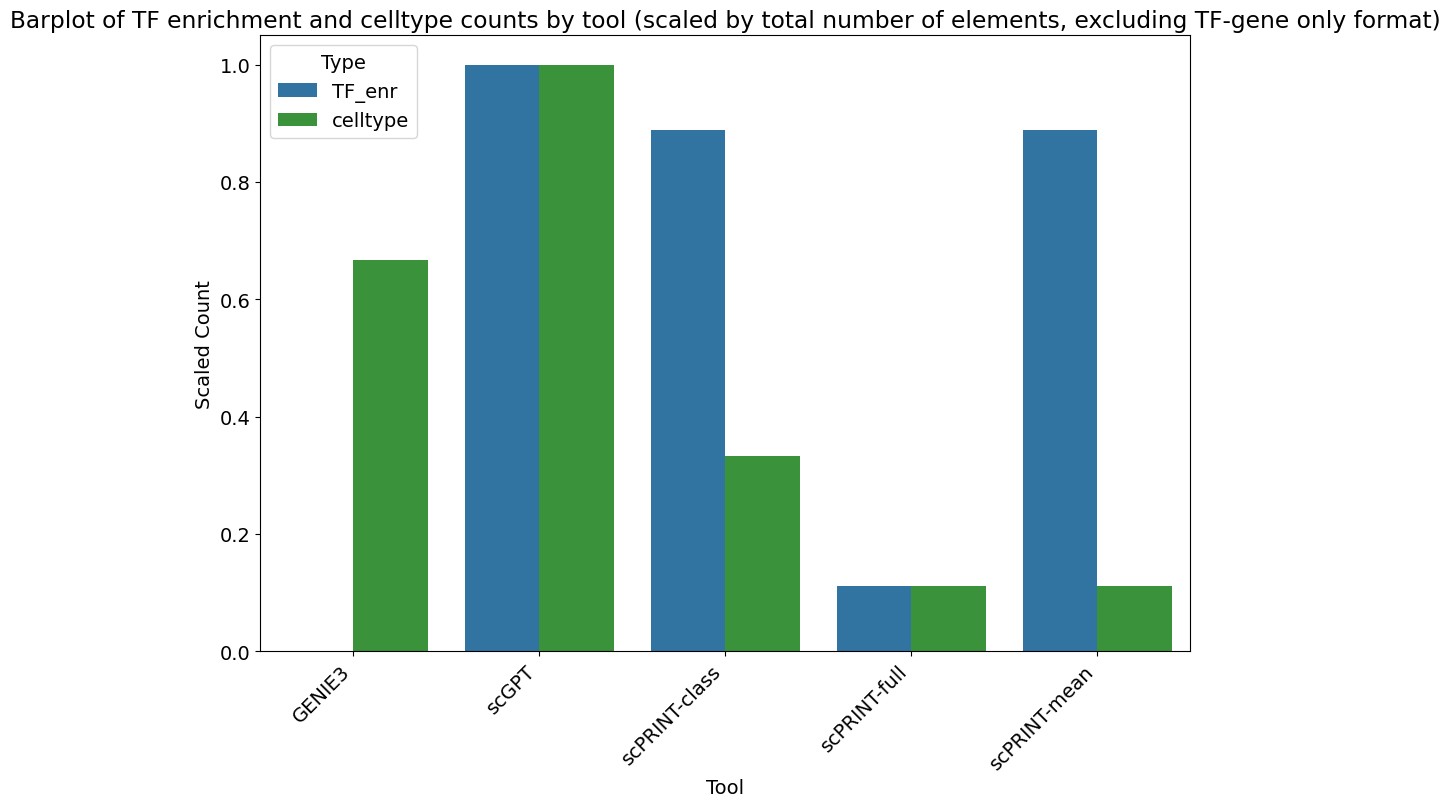

In [49]:
# Filter the data to exclude 'TF-gene only' format
filtered_res = res[res.Format != 'TF-gene only']

# Count the number of TF_enr and celltype
tf_enr_count = filtered_res.groupby(['tool'])['TF_enr'].sum().reset_index()
celltype_count = filtered_res.groupby(['tool'])['celltype'].sum().reset_index()

# Calculate the total number of elements per tool
total_count = filtered_res.groupby(['tool']).size().reset_index(name='Total')

# Merge the total count with tf_enr_count and celltype_count
tf_enr_count = tf_enr_count.merge(total_count, on='tool')
celltype_count = celltype_count.merge(total_count, on='tool')

# Scale the counts by the total number of elements per tool
tf_enr_count['Count'] = tf_enr_count['TF_enr'] / tf_enr_count['Total']
celltype_count['Count'] = celltype_count['celltype'] / celltype_count['Total']

# Create a new DataFrame for plotting
tf_enr_count['Type'] = 'TF_enr'
celltype_count['Type'] = 'celltype'
tf_enr_count = tf_enr_count[['tool', 'Count', 'Type']]
celltype_count = celltype_count[['tool', 'Count', 'Type']]
count_data = pd.concat([tf_enr_count, celltype_count])

# Create the barplot with hue for Type
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='tool', y='Count', hue='Type', data=count_data, palette=[sns.color_palette()[0], sns.color_palette()[2]])

# Set the title and labels of the plot
bar_plot.set_title('Barplot of TF enrichment and celltype counts by tool (scaled by total number of elements, excluding TF-gene only format)')
bar_plot.set_xlabel('Tool')
bar_plot.set_ylabel('Scaled Count')

# Rotate the x labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


In [67]:
res = pd.read_csv('data/sroy.tsv', sep="\t", )
res

,tool,name,EPR,AUPRC,RAND,TF_only
0,genie3,han,1.44,0.0292,0.0274,False
1,genie3,han_chip,1.21,0.2766,0.2537,False
2,genie3,han_ko,1.12,0.0775,0.0766,True
3,genie3,han,1.12,0.0775,0.0766,True
4,genie3,han_chip,0.78,0.2621,0.2537,True
5,genie3,mine,2.17,0.0282,0.0247,True
6,genie3,mine,1.09,0.0286,0.0247,False
7,genie3,tran,1.22,0.0424,0.0405,True
8,genie3,tran_chip,1.48,0.2291,0.1989,True
9,genie3,tran_ko,0.98,0.0824,0.0796,True


In [68]:
res['name'] = res['name'].replace({'mine':'ours'})

/local/scratch/tmp/ipykernel_2600111/3824855976.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_res['tool'] = filtered_res.apply(lambda row: f"{row['tool']}-TF" if row['TF_only'] else row['tool'], axis=1)


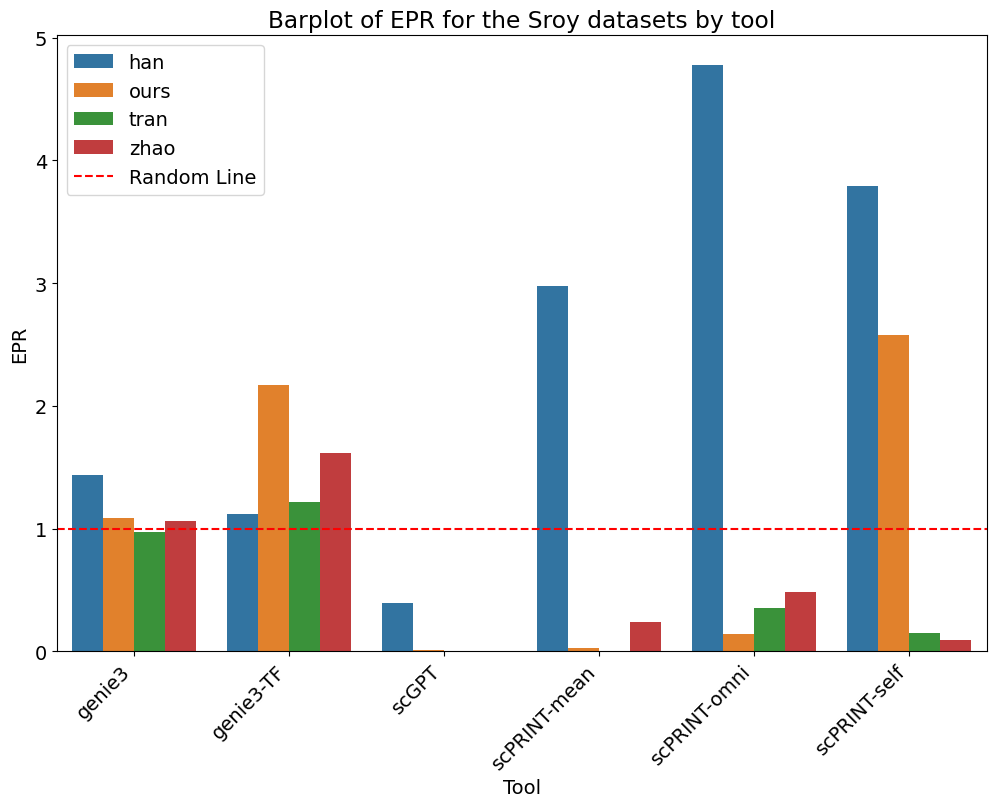

In [69]:
filtered_res = res[res['name'].isin(['han','ours','tran', 'zhao'])]

filtered_res['tool'] = filtered_res.apply(lambda row: f"{row['tool']}-TF" if row['TF_only'] else row['tool'], axis=1)
filtered_res = filtered_res.rename(columns={'name': "dataset"})

filtered_res = filtered_res.pivot(index='tool', columns='dataset', values='EPR').reset_index()

plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='tool', y='value', hue='dataset', data=filtered_res.melt(id_vars='tool', value_name='value'))

# Add the random line at y=1
plt.axhline(y=1, color='r', linestyle='--', label='random')

# Set the title and labels of the plot
bar_plot.set_title('Barplot of EPR for the Sroy datasets by tool')
bar_plot.set_xlabel('Tool')
bar_plot.set_ylabel('EPR')

# Rotate the x labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.legend()
plt.show()


/local/scratch/tmp/ipykernel_3167849/951922680.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_res['tool'] = filtered_res.apply(lambda row: f"{row['tool']}-TF" if row['TF_only'] else row['tool'], axis=1)


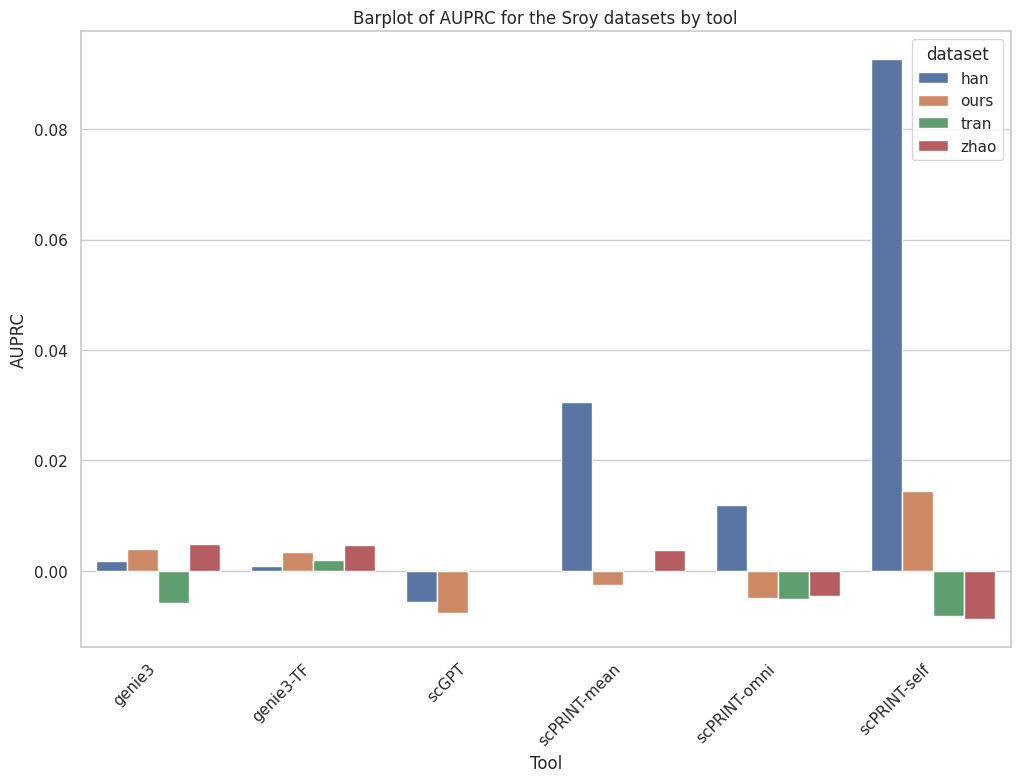

In [124]:
filtered_res = res[res['name'].isin(['han','ours','tran', 'zhao'])]

filtered_res['tool'] = filtered_res.apply(lambda row: f"{row['tool']}-TF" if row['TF_only'] else row['tool'], axis=1)
filtered_res = filtered_res.rename(columns={'name': "dataset"})

filtered_res = filtered_res.pivot(index='tool', columns='dataset', values='AUPRC').reset_index()

plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='tool', y='value', hue='dataset', data=filtered_res.melt(id_vars='tool', value_name='value'))

# Set the title and labels of the plot
bar_plot.set_title('Barplot of AUPRC for the Sroy datasets by tool')
bar_plot.set_xlabel('Tool')
bar_plot.set_ylabel('AUPRC')

# Rotate the x labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()